In [70]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

## Authentication

In [3]:
spotify_url = 'https://open.spotify.com/user/spotify/playlist/37i9dQZF1DX0XUsuxWHRQd'
client_id = '2f2a2d3c5b2f4621ae1758439dae20c4'
client_secret = 'client_secret'


In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Extract Data
* create spotipy object
* "walk through" data's hierarchy to drill down on desired information
* extract desired fields into lists


In [5]:
playlist = sp.user_playlist(spotify_url.split('/')[4],spotify_url.split('/')[6])
#take a peek at playlist variable
pd.io.json.json_normalize(playlist)

,collaborative,description,external_urls.spotify,followers.href,followers.total,href,id,images,name,owner.display_name,owner.external_urls.spotify,owner.href,owner.id,owner.type,owner.uri,primary_color,public,snapshot_id,tracks.href,tracks.items,tracks.limit,tracks.next,tracks.offset,tracks.previous,tracks.total,type,uri
0,False,Cardi B's new album is here & watch A$AP Rocky...,https://open.spotify.com/user/spotify/playlist...,None,9284601,https://api.spotify.com/v1/users/spotify/playl...,37i9dQZF1DX0XUsuxWHRQd,"[{'height': 300, 'url': 'https://i.scdn.co/ima...",RapCaviar,Spotify,https://open.spotify.com/user/spotify,https://api.spotify.com/v1/users/spotify,spotify,user,spotify:user:spotify,#F49B23,True,Dln7J3OaGBs740nvBhrNDM7d9Ix6FySL9J5TkfY989cEsx...,https://api.spotify.com/v1/users/spotify/playl...,"[{'added_at': '2018-04-11T21:34:13Z', 'added_b...",100,None,0,None,50,playlist,spotify:user:spotify:playlist:37i9dQZF1DX0XUsu...


In [6]:
#check how many tracks can be found within the items hierarchy
num_songs = len(playlist['tracks']['items'])
num_songs

50

In [7]:
#take a peek at each individual track
pd.io.json.json_normalize(playlist['tracks']['items'][2])

,added_at,added_by,is_local,primary_color,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,track.album.id,track.album.images,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.type,track.album.uri,track.artists,track.available_markets,track.disc_number,track.duration_ms,track.episode,track.explicit,track.external_ids.isrc,track.external_urls.spotify,track.href,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2018-04-11T21:34:13Z,None,False,#b70174,single,[{'external_urls': {'spotify': 'https://open.s...,[],https://open.spotify.com/album/0GqyPabtBnNbl73...,https://api.spotify.com/v1/albums/0GqyPabtBnNb...,0GqyPabtBnNbl73Vivcatv,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Plug Walk,2018-02-08,day,album,spotify:album:0GqyPabtBnNbl73Vivcatv,[{'external_urls': {'spotify': 'https://open.s...,[],1,175510,False,True,USUM71800892,https://open.spotify.com/track/0gD6lWJhbXHWNVw...,https://api.spotify.com/v1/tracks/0gD6lWJhbXHW...,0gD6lWJhbXHWNVwQziSVvl,False,Plug Walk,90,None,True,1,track,spotify:track:0gD6lWJhbXHWNVwQziSVvl,None


In [8]:
pd.io.json.json_normalize(playlist['tracks']['items'][2]['track'])

,album.album_type,album.artists,album.available_markets,album.external_urls.spotify,album.href,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.type,album.uri,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids.isrc,external_urls.spotify,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,single,[{'external_urls': {'spotify': 'https://open.s...,[],https://open.spotify.com/album/0GqyPabtBnNbl73...,https://api.spotify.com/v1/albums/0GqyPabtBnNb...,0GqyPabtBnNbl73Vivcatv,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Plug Walk,2018-02-08,day,album,spotify:album:0GqyPabtBnNbl73Vivcatv,[{'external_urls': {'spotify': 'https://open.s...,[],1,175510,False,True,USUM71800892,https://open.spotify.com/track/0gD6lWJhbXHWNVw...,https://api.spotify.com/v1/tracks/0gD6lWJhbXHW...,0gD6lWJhbXHWNVwQziSVvl,False,Plug Walk,90,None,True,1,track,spotify:track:0gD6lWJhbXHWNVwQziSVvl


In [9]:
#artists- can have multiple artists
playlist['tracks']['items'][2]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1pPmIToKXyGdsCF6LmqLmI'},
  'href': 'https://api.spotify.com/v1/artists/1pPmIToKXyGdsCF6LmqLmI',
  'id': '1pPmIToKXyGdsCF6LmqLmI',
  'name': 'Rich The Kid',
  'type': 'artist',
  'uri': 'spotify:artist:1pPmIToKXyGdsCF6LmqLmI'}]

In [10]:
#do tracks have different number of available markets?
set([len(playlist['tracks']['items'][i]['track']['available_markets']) 
     for i in range(0,50)])

{0, 3, 64, 65}

In [11]:
#getting name
track_name = [playlist['tracks']['items'][i]['track']['name'] for i in range(0,num_songs)]
track_popularity = [playlist['tracks']['items'][i]['track']['popularity'] for i in range(0,num_songs)]
track_duration = [playlist['tracks']['items'][i]['track']['duration_ms'] for i in range(0,num_songs)]
track_id = [playlist['tracks']['items'][i]['track']['id'] for i in range(0,num_songs)]
#taking only the first artist's name
artist_name = [playlist['tracks']['items'][i]['track']['artists'][0]['name'] for i in range(0,num_songs)]
artist_name2 = [playlist['tracks']['items'][i]['track']['artists'][0]['name'] if len(playlist['tracks']['items'][i]['track']['artists']) > 1 else "" for i in range(0,num_songs)]
artist_id = [playlist['tracks']['items'][i]['track']['artists'][0]['id'] for i in range(0,num_songs)]

In [12]:
playlist['tracks']['items'][0]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
  'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
  'id': '3TVXtAsR1Inumwj472S9r4',
  'name': 'Drake',
  'type': 'artist',
  'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}]

In [13]:
#all albums are at the day precision level
album_name = [playlist['tracks']['items'][i]['track']['album']['name'] for i in range(0,num_songs)]
album_release_date = [playlist['tracks']['items'][i]['track']['album']['release_date'] for i in range(0,num_songs)]

In [14]:
#pulling artist information
artists_info = [sp.artist(artist_id[i]) for i in range(0,num_songs)]

In [15]:
artists_info[0].keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [16]:
artist_popularity = [artists_info[i]['popularity'] for i in range(0,num_songs)]
artist_followers = [artists_info[i]['followers']['total'] for i in range(0,num_songs)]
artist_genres = [artists_info[i]['genres'] for i in range(0,num_songs)]

# Transform Data
* cast extracted information into pandas dataframe
* transform genre feature from elements within a list into dummy variables
* ensure column names do not have spaces
* drop duplicates in artist dataframe
* check for NA's 

In [17]:
df_track = pd.DataFrame([track_name, 
                         track_popularity,
                        track_duration,
                        track_id,
                        artist_name,
                        artist_name2,
                        artist_id,
                        album_name,
                        album_release_date,]).T

df_track.columns = ['track_name', 
                         'track_popularity',
                        'track_duration',
                        'track_id',
                        'artist_name',
                        'artist_name2',
                        'artist_id',
                        'album_name',
                        'album_release_date']

In [18]:
df_artist = pd.DataFrame([artist_name,
                         artist_id,
                         artist_popularity,
                         artist_followers,
                         artist_genres]).T

df_artist.columns = ['artist_name',
                         'artist_id',
                         'artist_popularity',
                         'artist_followers',
                         'artist_genres']

In [19]:
#extract individual genres from list of genre, turn into dummy variables, drop duplicates
df_artist.artist_genres = df_artist.artist_genres.apply(lambda x:",".join(map(str,x)))
df_artist = pd.concat([df_artist.iloc[:,:-1],df_artist.artist_genres.str.get_dummies(sep = ',')], axis = 1)
df_artist = df_artist.drop_duplicates(subset = 'artist_id').reset_index(drop = True)

In [22]:
#ensure column names do not have spaces
df_artist.columns = df_artist.columns.str.replace(" ","_")
df_artist.head(2)

,artist_name,artist_id,artist_popularity,artist_followers,boston_rock,canadian_hip_hop,canadian_pop,crunk,dance_pop,deep_trap,dirty_south_rap,drill,dwn_trap,east_coast_hip_hop,gangster_rap,hip_hop,indie_r&b,pop,pop_rap,r&b,rap,southern_hip_hop,trap_music,trap_soul,underground_hip_hop,vapor_trap
0,Drake,3TVXtAsR1Inumwj472S9r4,100,18630408,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,Famous Dex,0WOxhx4hikIsyF3CRPLC8W,81,542423,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,1,1


In [24]:
df_track.isna().sum()

track_name            0
track_popularity      0
track_duration        0
track_id              0
artist_name           0
artist_name2          0
artist_id             0
album_name            0
album_release_date    0
dtype: int64

In [25]:
df_artist.isna().sum()

artist_name            0
artist_id              0
artist_popularity      0
artist_followers       0
boston_rock            0
canadian_hip_hop       0
canadian_pop           0
crunk                  0
dance_pop              0
deep_trap              0
dirty_south_rap        0
drill                  0
dwn_trap               0
east_coast_hip_hop     0
gangster_rap           0
hip_hop                0
indie_r&b              0
pop                    0
pop_rap                0
r&b                    0
rap                    0
southern_hip_hop       0
trap_music             0
trap_soul              0
underground_hip_hop    0
vapor_trap             0
dtype: int64

The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

# Load Data
* create mydb using sqlite3
* load created dataframes into sqlite databases

In [30]:
import sqlite3
sqlite_file = 'mydb'
cnx = sqlite3.connect(sqlite_file)
c = cnx.cursor()

In [31]:
# load panda dataframes into sqlite databases
df_track.to_sql('track_db', cnx)
df_artist.loc[:,:].to_sql('artist_db', cnx)

In [32]:
c.execute('''SELECT * FROM track_db''')
c.description

(('index', None, None, None, None, None, None),
 ('track_name', None, None, None, None, None, None),
 ('track_popularity', None, None, None, None, None, None),
 ('track_duration', None, None, None, None, None, None),
 ('track_id', None, None, None, None, None, None),
 ('artist_name', None, None, None, None, None, None),
 ('artist_name2', None, None, None, None, None, None),
 ('artist_id', None, None, None, None, None, None),
 ('album_name', None, None, None, None, None, None),
 ('album_release_date', None, None, None, None, None, None))

In [33]:
c.execute('''SELECT * FROM artist_db''')
c.description

(('index', None, None, None, None, None, None),
 ('artist_name', None, None, None, None, None, None),
 ('artist_id', None, None, None, None, None, None),
 ('artist_popularity', None, None, None, None, None, None),
 ('artist_followers', None, None, None, None, None, None),
 ('boston_rock', None, None, None, None, None, None),
 ('canadian_hip_hop', None, None, None, None, None, None),
 ('canadian_pop', None, None, None, None, None, None),
 ('crunk', None, None, None, None, None, None),
 ('dance_pop', None, None, None, None, None, None),
 ('deep_trap', None, None, None, None, None, None),
 ('dirty_south_rap', None, None, None, None, None, None),
 ('drill', None, None, None, None, None, None),
 ('dwn_trap', None, None, None, None, None, None),
 ('east_coast_hip_hop', None, None, None, None, None, None),
 ('gangster_rap', None, None, None, None, None, None),
 ('hip_hop', None, None, None, None, None, None),
 ('indie_r&b', None, None, None, None, None, None),
 ('pop', None, None, None, None,

# Solutions to Given Questions (using SQL and pandas)

In [45]:
df_track = pd.read_sql('''SELECT * FROM track_db''', cnx, index_col='index')
df_artist = pd.read_sql('''SELECT * FROM artist_db''', cnx, index_col='index')

## How many songs are in the playlist?

In [46]:
# SQL Solution
c.execute('''SELECT COUNT(DISTINCT track_name) FROM track_db''')
c.fetchone()

(50,)

In [48]:
# pandas Solution
df_track.track_name.nunique()

50

## What are the top 5 tracks by artist follower count?

In [51]:
#SQL Solution
c.execute('''SELECT t.track_name, a.artist_name, a.artist_followers
    FROM track_db as t JOIN artist_db as a 
    ON a.artist_id = t.artist_id
    ORDER BY a.artist_followers DESC
    LIMIT 5''')
cnx.commit()
c.fetchall()

[('Nice For What', 'Drake', 18630408),
 ("God's Plan", 'Drake', 18630408),
 ('Try Me', 'The Weeknd', 9981791),
 ('Walk It Talk It', 'Migos', 4865734),
 ('Stir Fry', 'Migos', 4865734)]

In [ ]:
df

In [190]:
#pandas Solution
top_tracks = df_track.merge(df_artist, on = ['artist_id','artist_name']).sort_values(
    by = 'artist_followers', 
    ascending = False)[['track_name','artist_name','artist_followers']].head(5)
top_tracks

,track_name,artist_name,artist_followers
0,Nice For What,Drake,18630408
1,God's Plan,Drake,18630408
27,Try Me,The Weeknd,9981791
11,Walk It Talk It,Migos,4865734
12,Stir Fry,Migos,4865734


Text(0.5,1,'Top Tracks by Artist Followers')

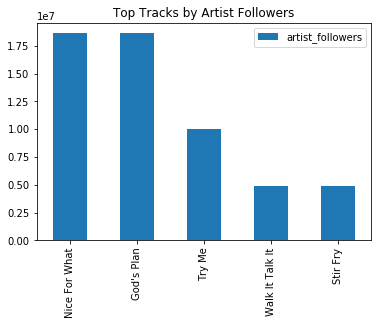

In [173]:
#pandas graph
top_tracks.plot.bar()
plt.xticks(np.array(range(0,5)),top_tracks.track_name )
plt.title('Top Tracks by Artist Followers')

# What are the top 5 tracks by artist follower count? (unique artists)

In [148]:
#SQL Solution
c.execute('''SELECT t.track_name, a.artist_name, a.artist_followers
    FROM track_db as t JOIN artist_db as a 
    ON a.artist_id = t.artist_id
    GROUP BY a.artist_followers
    ORDER BY a.artist_followers DESC
    LIMIT 5''')
cnx.commit()
c.fetchall()

[("God's Plan", 'Drake', 18630408),
 ('Try Me', 'The Weeknd', 9981791),
 ('Stir Fry', 'Migos', 4865734),
 ('Sauce It Up', 'Lil Uzi Vert', 3597477),
 ('A$AP Forever', 'A$AP Rocky', 3456029)]

In [170]:
#pandas Solution
unique_top_tracks = df_track.merge(df_artist, on = ['artist_id','artist_name']).sort_values(
    by = 'artist_followers', 
    ascending = False)[['track_name','artist_name','artist_followers']].drop_duplicates(subset = 'artist_name',
                                                                                       keep = 'first').head(5)
unique_top_tracks

,track_name,artist_name,artist_followers
0,Nice For What,Drake,18630408
27,Try Me,The Weeknd,9981791
11,Walk It Talk It,Migos,4865734
40,Sauce It Up,Lil Uzi Vert,3597477
21,A$AP Forever,A$AP Rocky,3456029


Text(0.5,1,'Top Tracks by Unique Artist Followers')

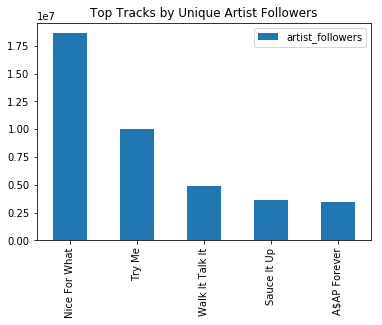

In [172]:
#pandas graph
unique_top_tracks.plot.bar()
plt.xticks(np.array(range(0,5)),unique_top_tracks.track_name)
plt.title('Top Tracks by Unique Artist Followers')

## Which song is the Longest?

In [53]:
#SQL Solution
c.execute('''SELECT MAX(track_duration),artist_name, track_name from track_db''')
cnx.commit()
c.fetchall()

[(332300, 'Rae Sremmurd', 'Powerglide (feat. Juicy J)')]

In [55]:
# pandas Solution
df_track.sort_values(by = 'track_duration', 
                     ascending = False)[['track_name',
                                         'artist_name',
                                         'track_duration']].head(1)

,track_name,artist_name,track_duration
index,,,
7,Powerglide (feat. Juicy J),Rae Sremmurd,332300


# Exploring Data
* merging track and artist dataframes into one dataframe called df

In [59]:
df = pd.merge(df_track[['track_name', 'track_popularity', 'track_duration', 
       'artist_name', 'artist_id',
       'album_release_date']],
         df_artist[['artist_id', 'artist_popularity', 'artist_followers',
       'boston_rock', 'canadian_hip_hop', 'canadian_pop', 'crunk', 'dance_pop',
       'deep_trap', 'dirty_south_rap', 'drill', 'dwn_trap',
       'east_coast_hip_hop', 'gangster_rap', 'hip_hop', 'indie_r&b', 'pop',
       'pop_rap', 'r&b', 'rap', 'southern_hip_hop', 'trap_music', 'trap_soul',
       'underground_hip_hop', 'vapor_trap']], on = 'artist_id')
df

,track_name,track_popularity,track_duration,artist_name,artist_id,album_release_date,artist_popularity,artist_followers,boston_rock,canadian_hip_hop,canadian_pop,crunk,dance_pop,deep_trap,dirty_south_rap,drill,dwn_trap,east_coast_hip_hop,gangster_rap,hip_hop,indie_r&b,pop,pop_rap,r&b,rap,southern_hip_hop,trap_music,trap_soul,underground_hip_hop,vapor_trap
0,Nice For What,88,210925,Drake,3TVXtAsR1Inumwj472S9r4,2018-04-06,100,18630408,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,God's Plan,98,198960,Drake,3TVXtAsR1Inumwj472S9r4,2018-01-20,100,18630408,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,JAPAN,87,144149,Famous Dex,0WOxhx4hikIsyF3CRPLC8W,2018-03-16,81,542423,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,1,1
3,PICK IT UP (feat. A$AP Rocky),90,191251,Famous Dex,0WOxhx4hikIsyF3CRPLC8W,2017-10-20,81,542423,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,1,1
4,Plug Walk,90,175510,Rich The Kid,1pPmIToKXyGdsCF6LmqLmI,2018-02-08,87,660105,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0
5,End Of Discussion (feat. Lil Wayne),79,236944,Rich The Kid,1pPmIToKXyGdsCF6LmqLmI,2018-03-30,87,660105,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0
6,Too Gone (feat. Khalid),78,184904,Rich The Kid,1pPmIToKXyGdsCF6LmqLmI,2018-03-30,87,660105,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0
7,Look Alive (feat. Drake),98,181263,BlocBoy JB,4TEJudQY2pXxVHPE3gD2EU,2018-02-09,85,70931,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0
8,Rover 2.0,80,275872,BlocBoy JB,4TEJudQY2pXxVHPE3gD2EU,2018-03-23,85,70931,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0
9,SAD!,89,166568,XXXTENTACION,15UsOTVnJzReFVN1VCnxy4,2018-03-02,96,2941343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


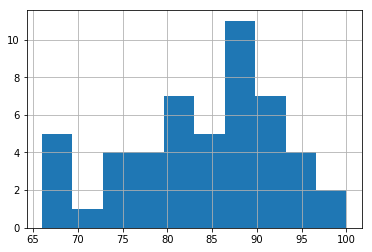

In [67]:
df.artist_popularity.hist()

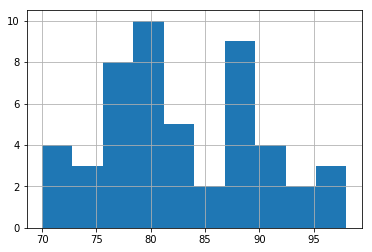

In [66]:
df.track_popularity.hist()

Text(0,0.5,'Artist Popularity')

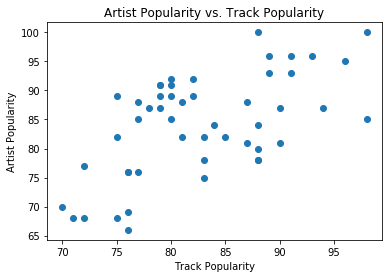

In [83]:
fig, ax = plt.subplots()
ax.scatter(df.track_popularity, df.artist_popularity)
ax.set_title('Artist Popularity vs. Track Popularity')
ax.set_xlabel('Track Popularity')
ax.set_ylabel('Artist Popularity')

Text(0,0.5,'Artist Followers')

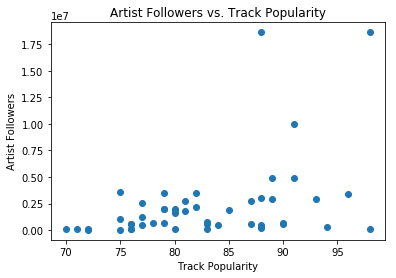

In [107]:
fig, ax = plt.subplots()
ax.scatter(df.track_popularity, df.artist_followers)
ax.set_title('Artist Followers vs. Track Popularity')
ax.set_xlabel('Track Popularity')
ax.set_ylabel('Artist Followers')

In [196]:
df.track_popularity.nunique()

23

Text(0,0.5,'Artist Folowers')

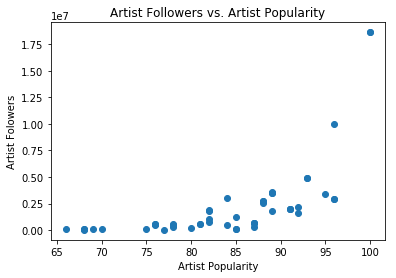

In [193]:
fig, ax = plt.subplots()
ax.scatter(df.artist_popularity, df.artist_followers)
ax.set_title('Artist Followers vs. Artist Popularity')
ax.set_xlabel('Artist Popularity')
ax.set_ylabel('Artist Folowers')